Git repo link:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-prasadwrites

### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [42]:
userrating = pd.read_csv('data.csv')
moviegenre = pd.read_csv('item.csv')
userinfo = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [43]:
###### 'userrating' dataframe number of columns
userrating.count()

user id      100000
movie id     100000
rating       100000
timestamp    100000
dtype: int64

In [44]:
###### viewing first couple of rows
userrating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [45]:
###### Lets examine 'userrating' dataframe
userrating.info()
userrating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


from the above observations we get that userrating contains only int64 type values. we get a nice five point summary of data
in userrating dataframe, though only the values for 'rating' column make sense.

In [46]:
###### userrating shape
userrating.shape

(100000, 4)

In [47]:
###### examine if userrating has any null coloumns
userrating.isnull().values.any()


False

In [48]:
userrating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

From the above observations of user rating we find that it has 100000 user ratings and none of the rows has null vallues.

In [49]:
###### Now lets examine the moviegenre dataframe like we did for userrating. 
moviegenre.count()

movie id        1681
movie title     1681
release date    1681
unknown         1681
Action          1681
Adventure       1681
Animation       1681
Childrens       1681
Comedy          1681
Crime           1681
Documentary     1681
Drama           1681
Fantasy         1681
Film-Noir       1681
Horror          1681
Musical         1681
Mystery         1681
Romance         1681
Sci-Fi          1681
Thriller        1681
War             1681
Western         1681
dtype: int64

In [50]:
moviegenre.shape

(1681, 22)

In [51]:
moviegenre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [52]:
moviegenre.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [53]:
moviegenre.describe()


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
moviegenre.isnull().values.any() 

False

In [55]:
moviegenre.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [56]:
###### Now lets examine the userinfo dataframe
userinfo.count()

user id       943
age           943
gender        943
occupation    943
zip code      943
dtype: int64

In [57]:
userinfo.shape

(943, 5)

In [58]:
userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [59]:
userinfo.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [60]:
userinfo.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [61]:
userinfo.isnull().values.any()

False

In [62]:
userinfo.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [63]:
genre_list = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genre_count_dict = { 'count of geners': [ moviegenre['unknown'].value_counts()[1], 
                    moviegenre['Action'].value_counts()[1], 
                    moviegenre['Adventure'].value_counts()[1], 
                    moviegenre['Animation'].value_counts()[1], 
                    moviegenre['Childrens'].value_counts()[1], 
                    moviegenre['Comedy'].value_counts()[1], 
                    moviegenre['Crime'].value_counts()[1], 
                    moviegenre['Documentary'].value_counts()[1], 
                    moviegenre['Drama'].value_counts()[1], 
                    moviegenre['Fantasy'].value_counts()[1], 
                    moviegenre['Film-Noir'].value_counts()[1], 
                    moviegenre['Horror'].value_counts()[1], 
                    moviegenre['Musical'].value_counts()[1], 
                    moviegenre['Mystery'].value_counts()[1], 
                    moviegenre['Romance'].value_counts()[1], 
                    moviegenre['Sci-Fi'].value_counts()[1], 
                    moviegenre['Thriller'].value_counts()[1], 
                    moviegenre['War'].value_counts()[1], 
                    moviegenre['Western'].value_counts()[1] ]}
genre_count_df = pd.DataFrame( genre_count_dict, index=genre_list)
print(genre_count_df)


             count of geners
unknown                    1
Action                   251
Adventure                135
Animation                 42
Childrens                122
Comedy                   505
Crime                    109
Documentary               50
Drama                    725
Fantasy                   22
Film-Noir                 24
Horror                    92
Musical                   56
Mystery                   61
Romance                  247
Sci-Fi                   101
Thriller                 251
War                       71
Western                   27


#### 5. Find the movies that have more than one genre - 2.5 marks

In [64]:
#hint: use sum on the axis = 1
for i in range(0, len(moviegenre)):
    if (moviegenre.loc[i,'unknown':].sum() > 1):
            print("\"{0}\" is in {1} genres".format(moviegenre.iloc[i][1] , moviegenre.loc[i,'unknown':].sum()))
    


"Toy Story " is in 3 genres
"GoldenEye " is in 3 genres
"Get Shorty " is in 3 genres
"Copycat " is in 3 genres
"Twelve Monkeys " is in 2 genres
"Babe " is in 3 genres
"Richard III " is in 2 genres
"Seven (Se7en) " is in 2 genres
"Usual Suspects, The " is in 2 genres
"Postino, Il " is in 2 genres
"French Twist (Gazon maudit) " is in 2 genres
"From Dusk Till Dawn " is in 5 genres
"Angels and Insects " is in 2 genres
"Muppet Treasure Island " is in 5 genres
"Braveheart " is in 3 genres
"Taxi Driver " is in 2 genres
"Rumble in the Bronx " is in 3 genres
"Apollo 13 " is in 3 genres
"Batman Forever " is in 4 genres
"Crimson Tide " is in 3 genres
"Desperado " is in 3 genres
"Doom Generation, The " is in 2 genres
"Free Willy 2: The Adventure Home " is in 3 genres
"Mad Love " is in 2 genres
"Net, The " is in 2 genres
"Strange Days " is in 3 genres
"Disclosure " is in 2 genres
"Dolores Claiborne " is in 2 genres
"Eat Drink Man Woman " is in 2 genres
"Ed Wood " is in 2 genres
"I.Q. " is in 2 genr

"Notorious " is in 3 genres
"To Catch a Thief " is in 3 genres
"Adventures of Robin Hood, The " is in 2 genres
"Around the World in 80 Days " is in 2 genres
"African Queen, The " is in 4 genres
"Fly Away Home " is in 2 genres
"Dumbo " is in 3 genres
"Bananas " is in 2 genres
"Bonnie and Clyde " is in 2 genres
"Dial M for Murder " is in 2 genres
"Magnificent Seven, The " is in 3 genres
"Lawrence of Arabia " is in 2 genres
"Wings of Desire " is in 3 genres
"Third Man, The " is in 2 genres
"Annie Hall " is in 2 genres
"Boot, Das " is in 3 genres
"Manhattan " is in 3 genres
"Great Escape, The " is in 2 genres
"Deer Hunter, The " is in 2 genres
"Down by Law " is in 2 genres
"Cool Hand Luke " is in 2 genres
"Big Sleep, The " is in 2 genres
"Ben-Hur " is in 3 genres
"Killing Fields, The " is in 2 genres
"Shine " is in 2 genres
"Addicted to Love " is in 2 genres
"Anastasia " is in 3 genres
"Mouse Hunt " is in 2 genres
"Mortal Kombat " is in 2 genres
"Pocahontas " is in 4 genres
"Misérables, Le

"Mercury Rising " is in 3 genres
"City of Lost Children, The " is in 2 genres
"Farewell My Concubine " is in 2 genres
"White Squall " is in 2 genres
"Unforgettable " is in 2 genres
"Craft, The " is in 2 genres
"Harriet the Spy " is in 2 genres
"Chain Reaction " is in 3 genres
"Island of Dr. Moreau, The " is in 2 genres
"First Kid " is in 2 genres
"Paradise Road " is in 2 genres
"Brassed Off " is in 3 genres
"Smile Like Yours, A " is in 2 genres
"Murder in the First " is in 2 genres
"With Honors " is in 2 genres
"Renaissance Man " is in 3 genres
"Charade " is in 4 genres
"Fox and the Hound, The " is in 2 genres
"Big Blue, The (Grand bleu, Le) " is in 2 genres
"Booty Call " is in 2 genres
"How to Make an American Quilt " is in 2 genres
"Indian in the Cupboard, The " is in 3 genres
"Unstrung Heroes " is in 2 genres
"Before Sunrise " is in 2 genres
"Some Folks Call It a Sling Blade " is in 2 genres
"Month by the Lake, A " is in 2 genres
"Funny Face " is in 2 genres
"Winnie the Pooh and the

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [65]:
moviegenre[moviegenre.unknown!=1]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [66]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

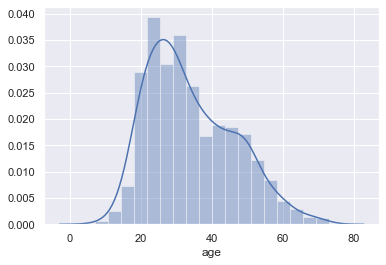

In [67]:
#distplot for age. kde is also shown
sns.distplot(userinfo['age'])

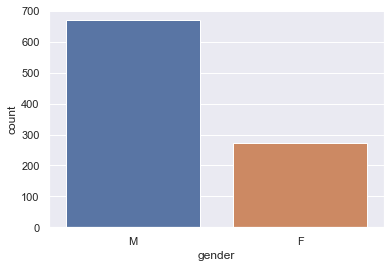

In [68]:
#count plot for gender
sns.countplot(userinfo['gender'])

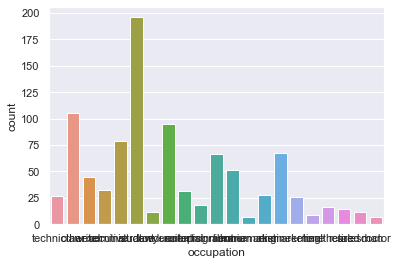

In [69]:
#countplot for occupation
sns.countplot( userinfo['occupation'])

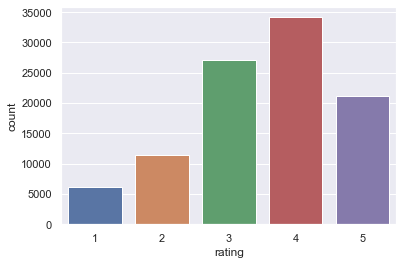

In [70]:
#countplot for ratings
sns.countplot( userrating['rating'])

In [71]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


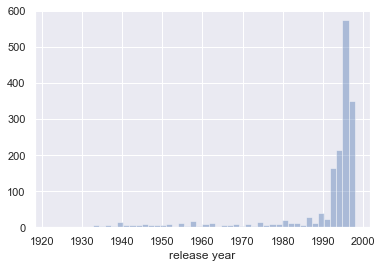

In [72]:
#distplot for release date
moviegenre['release year'] = moviegenre['release date'].str.split('-').str[-1]
sns.distplot(moviegenre['release year'], kde=False)

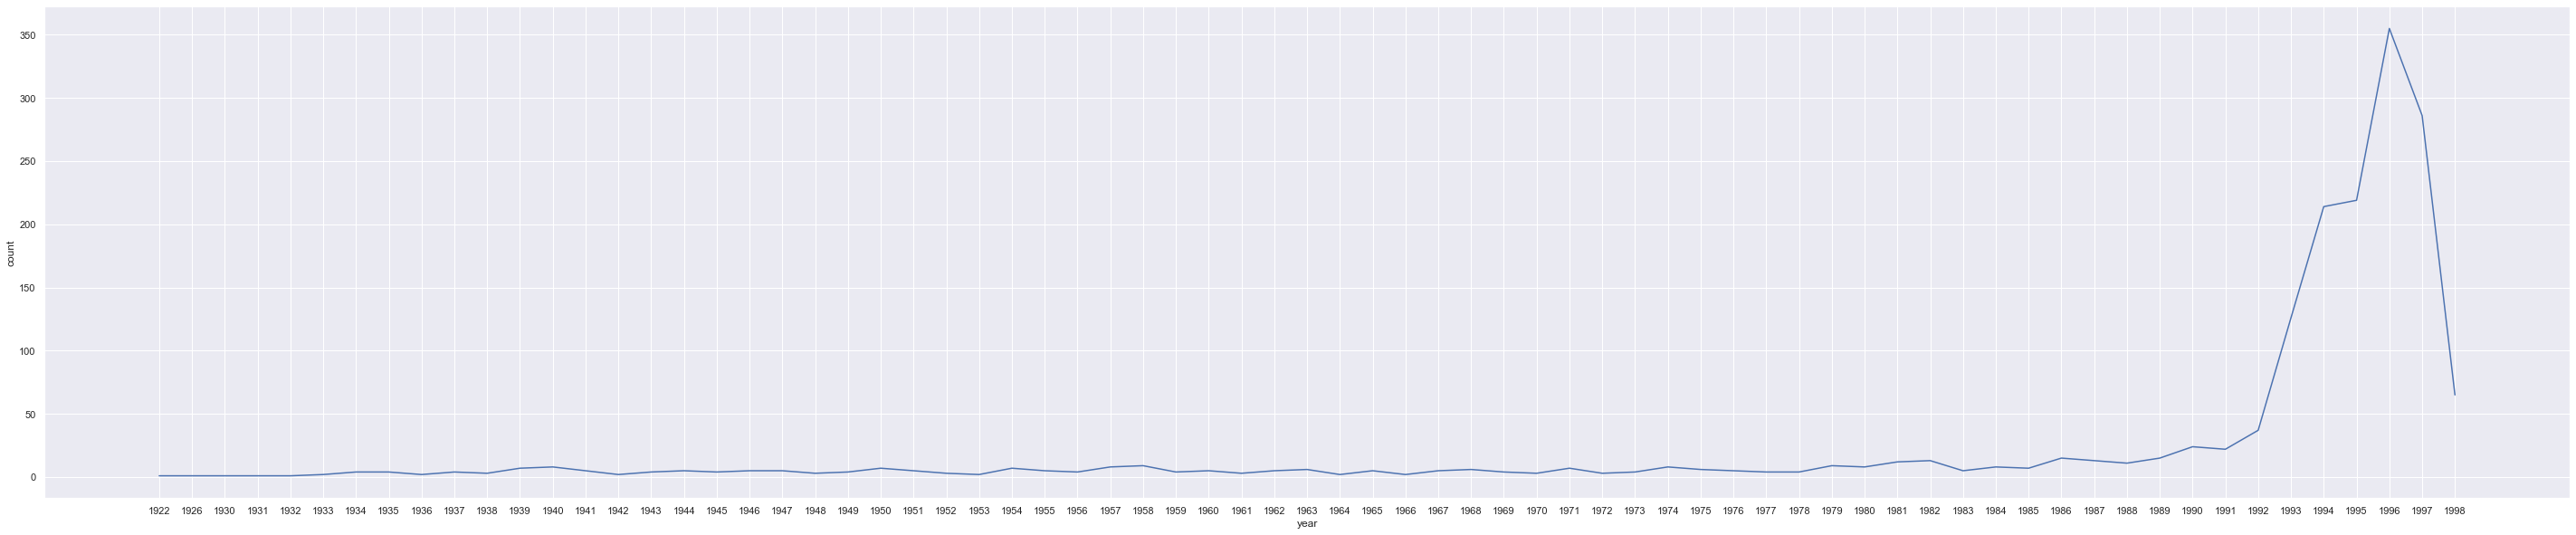

In [73]:
#lineplot of years of movies
#creating a year and corresponding releases count dataframe
moviegenre['release year'].value_counts()
moviegenre_count = moviegenre['release year'].value_counts().rename_axis('year').reset_index(name='count')
fig = plot.gcf()
fig.set_size_inches( 50, 10)
sns.lineplot(x='year', y='count',data=moviegenre_count)

In [74]:
moviegenre
moviegenre.iloc[0]['release year']
moviegenre.groupby(['release year', 'Action']).sum()
moviegenre.groupby(['release year', 'Comedy']).sum()
moviegenre.groupby(['release year', 'Adventure']).sum()
moviegenre.groupby(['release year', 'Animation']).sum()


movie id  unknown  Action  Adventure  Childrens  \
release year Animation                                                    
1922         0               675        0       0          0          0   
1926         0              1542        0       0          0          0   
1930         0               617        0       0          0          0   
1931         0               656        0       0          0          0   
1932         0              1124        0       0          0          0   
...                          ...      ...     ...        ...        ...   
1996         0            317879        0      44         23         16   
             1              4416        0       0          1          5   
1997         0            251129        0      46         19         19   
             1              2520        0       0          1          3   
1998         0             75341        0      12          3          1   

                        Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  \
release year Animation                                                          
1922         0               0      0            0      0        0          0   
1926         0               0      0            0      1        0          0   
1930         0               0      0            0      1        0          0   
1931         0               0      1            0      0        0          1   
1932         0               0      0            0      0        0          0   
...                        ...    ...          ...    ...      ...        ...   
1996         0             104     21           18    170        5          1   
             1               4      0            0      0        1          0   
1997         0              86     30            6    113        4          2   
             1               1      0            0      0        0          0   
1998         0              13      7            3     33        1          2   

                        Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
release year Animation                                                        
1922         0               1        0        0        0       0         0   
1926         0               0        0        0        0       0         0   
1930         0               0        0        0        0       0         0   
1931         0               0        0        0        0       0         1   
1932         0               0        0        0        1       0         0   
...                        ...      ...      ...      ...     ...       ...   
1996         0              11        6        6       38      14        46   
             1               0        3        0        0       1         1   
1997         0               8        2       18       51      13        54   
             1               0        3        0        0       0         0   
1998         0               4        1        3       11       5        18   

                        War  Western  
release year Animation                
1922         0            0        0  
1926         0            0        0  
1930         0            0        0  
1931         0            0        0  
1932         0            1        0  
...                     ...      ...  
1996         0            9        2  
             1            0        0  
1997         0           14        0  
             1            0        0  
1998         0            0        0  

[91 rows x 19 columns]

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [75]:
moviegenre.groupby('release year').sum()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


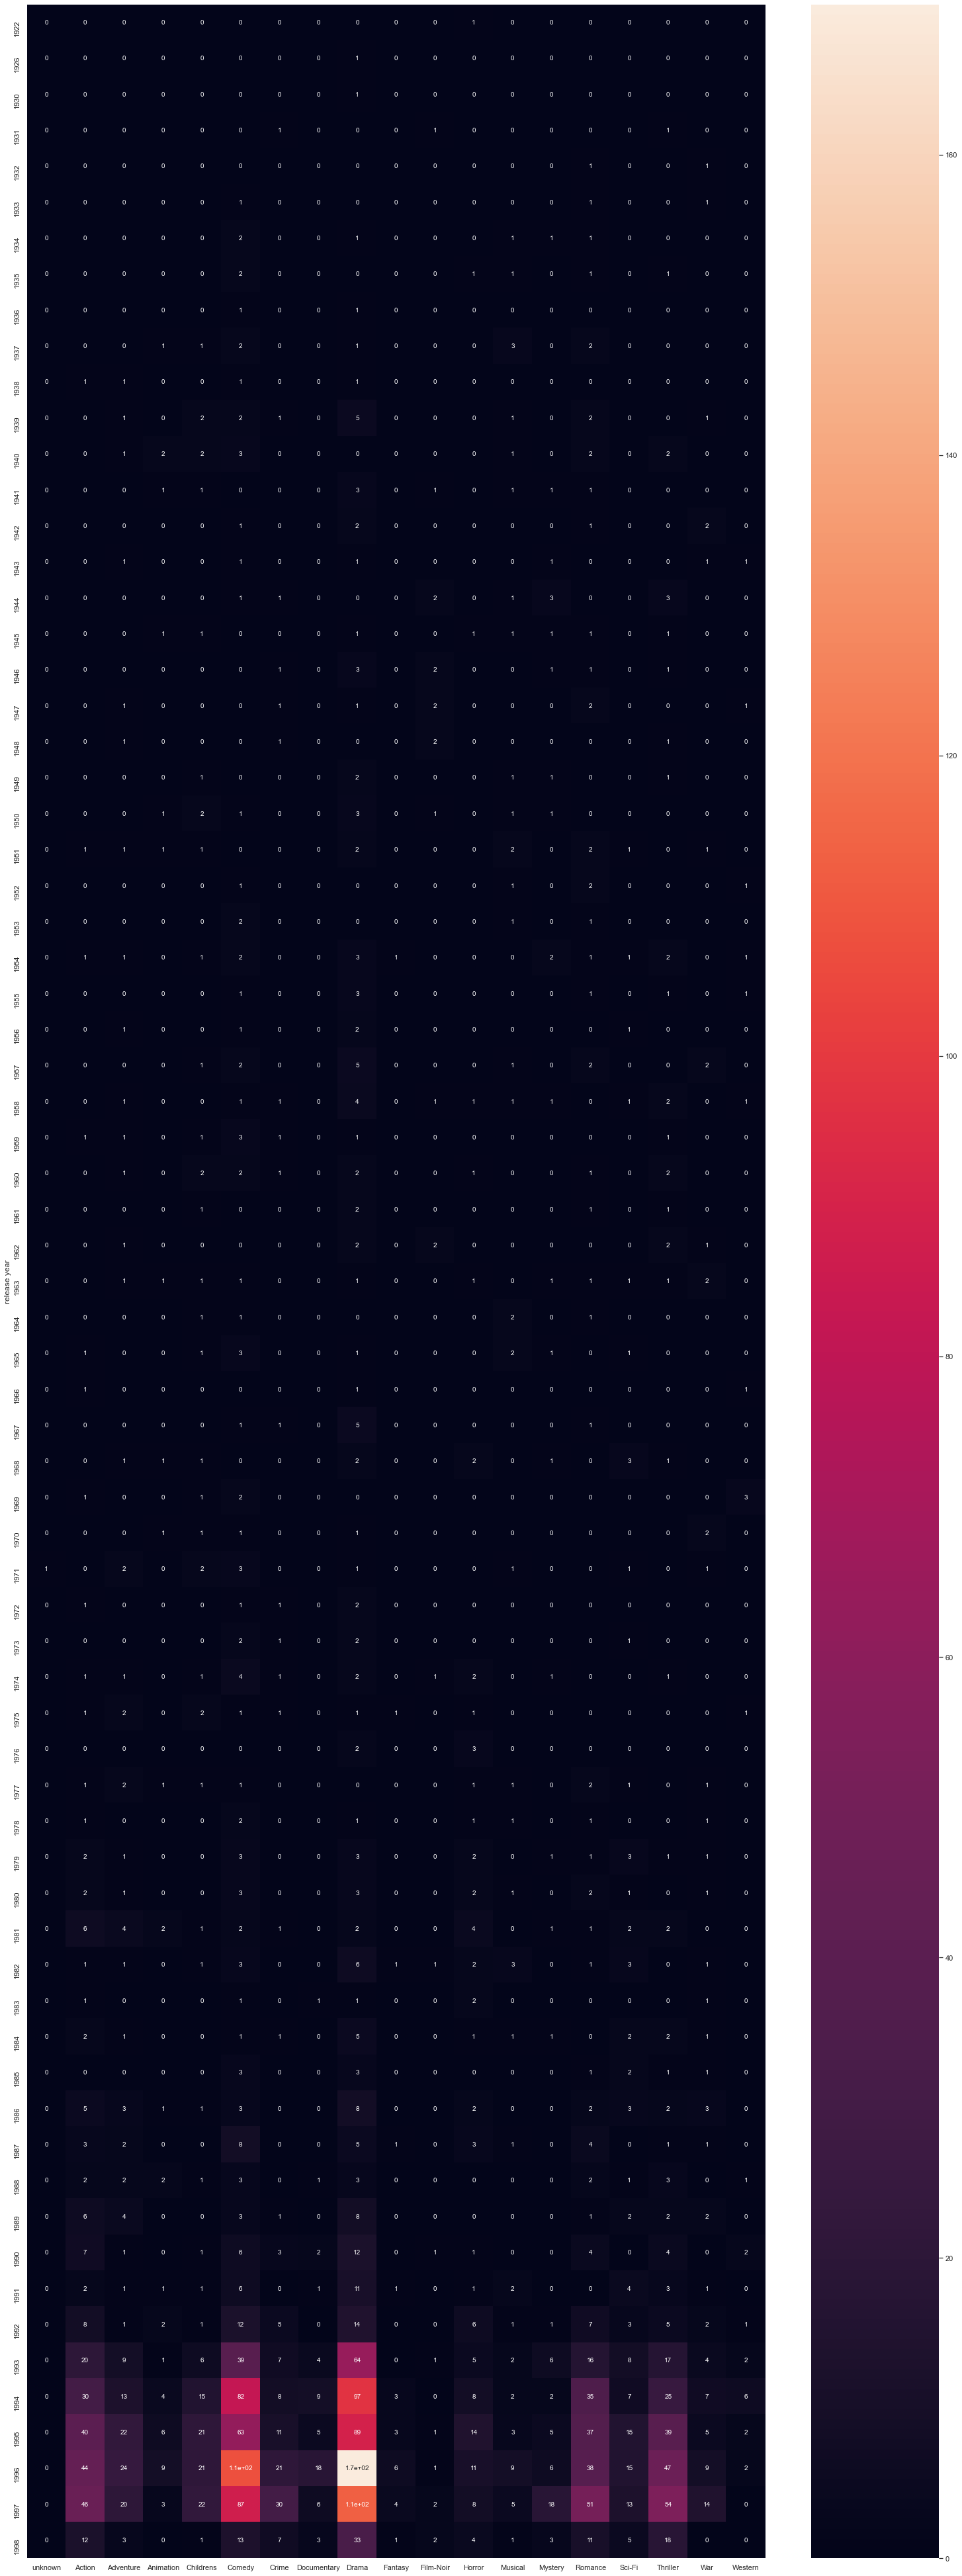

In [76]:
#genre_year_df = pd.DataFrame(genre_count_per_year,index=years) 
fig = plot.gcf()
fig.set_size_inches( 25, 71)
mpdf = moviegenre.drop('movie id',axis=1)
sns.heatmap(mpdf.groupby('release year').sum(),annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [77]:
#your answer here
userating_movie_id = userrating.groupby('movie id').count() 
#all records with more than 100 ratings
userating_more_than_100 = userating_movie_id[userating_movie_id['user id'] > 100]

#finding the average of the ratings
#movie_listings = list(userating_more_than_100.index.values) 

#finding out  the average of movies ratings
userrating_movie_rating = userrating.groupby('movie id').mean()
#selecting only movies with more than 100 listings
userating_more_than_100 = pd.merge(userating_more_than_100 ,userrating_movie_rating, how='inner', on= 'movie id')
userating_more_than_100 = userating_more_than_100.sort_values('rating_y', ascending=False)
movies_list = pd.merge(userating_more_than_100, moviegenre, how='inner',on='movie id')
movies_list_final = movies_list[['movie id','rating_y', 'movie title']]
movies_list_final.rename(columns={'rating_y':'rating'}, inplace=True)
#first 25 movies with highest average rating and more than 100 ratings
movies_list_final.head(25)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,movie id,rating,movie title
0,408,4.491071,"Close Shave, A"
1,318,4.466443,Schindler's List
2,169,4.466102,"Wrong Trousers, The"
3,483,4.456790,Casablanca
4,64,4.445230,"Shawshank Redemption, The"
5,603,4.387560,Rear Window
6,12,4.385768,"Usual Suspects, The"
7,50,4.358491,Star Wars
8,178,4.344000,12 Angry Men
9,134,4.292929,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [78]:
######## Men watch more drama than women ######################
#finding list of drama movies
moviegenre_drama = moviegenre[moviegenre['Drama'] == 1]
dramalist = moviegenre_drama['movie id'].tolist()

#all userrating for drama genre
userrating_drama = userrating[userrating['movie id'].isin(dramalist) ]
userrating_drama_list = userrating_drama['user id'].tolist()

#all users rated for drama from user database
userinfo_drama = userinfo[userinfo['user id'].isin(userrating_drama_list)]
userinfo_drama.groupby('gender').count()
drama_percent = 670 * 100 / (670+273)
print(drama_percent)

# Here as per user rating we can conclude that man watch more drama than women. So the statement given is right
# no of men who rated drama genre => 670
# no of women who rated drama genre => 273
# percent of men seeing the drama genre = 71%

71.04984093319194


In [79]:
########## Women watch more Sci-Fi than men ############
#finding list of scifi movies
moviegenre_scifi = moviegenre[moviegenre['Sci-Fi'] == 1]
scifilist = moviegenre_scifi['movie id'].tolist()

#all userrating for scifi genre
userrating_scifi = userrating[userrating['movie id'].isin(scifilist) ]
userrating_scifi_list = userrating_scifi['user id'].tolist()

#all users rated for scifi from user database
userinfo_scifi= userinfo[userinfo['user id'].isin(userrating_scifi_list)]
userinfo_scifi.groupby('gender').count()
scifi_percent = 256 * 100 / (652+256)
print(scifi_percent)


# Here as per user rating we can conclude that Women watch less Sci-Fi than Men. So the statement given is wrong.
# no of men who rated sci-fi genre => 652
# no of women who rated sci-fi genre => 256
# no of women watching scifi genre movies = 28.19

28.19383259911894


In [80]:
############ Men watch more Romance than women #################
#finding list of romance movies
moviegenre_romance = moviegenre[moviegenre['Romance'] == 1]
romancelist = moviegenre_romance['movie id'].tolist()

#all userrating for romance genre
userrating_romance = userrating[userrating['movie id'].isin(romancelist) ]
userrating_romance_list = userrating_romance['user id'].tolist()

#all users rated for romance from user database
userinfo_romance= userinfo[userinfo['user id'].isin(userrating_romance_list)]
userinfo_romance.groupby('gender').count()
romance_percent = 670 * 100 / (670+256)
print(romance_percent)


# Here as per user rating we can conclude that Men watch more romance than women. So the statement given is right.
# no of men who rated romance genre => 670
# no of women who rated romance genre => 256
# no of men watching romance genre movies = 72.35

72.35421166306695
